In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
df = pd.read_csv('Housing.csv')

In [323]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [324]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [325]:
df.shape

(545, 13)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [327]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [328]:
df.duplicated().sum()

np.int64(0)

In [329]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


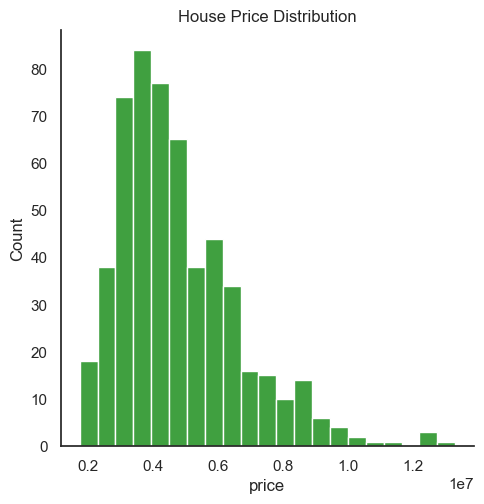

In [330]:
sns.displot(data=df, x="price", color="green")
sns.set(style="white")
plt.title("House Price Distribution")
plt.show()

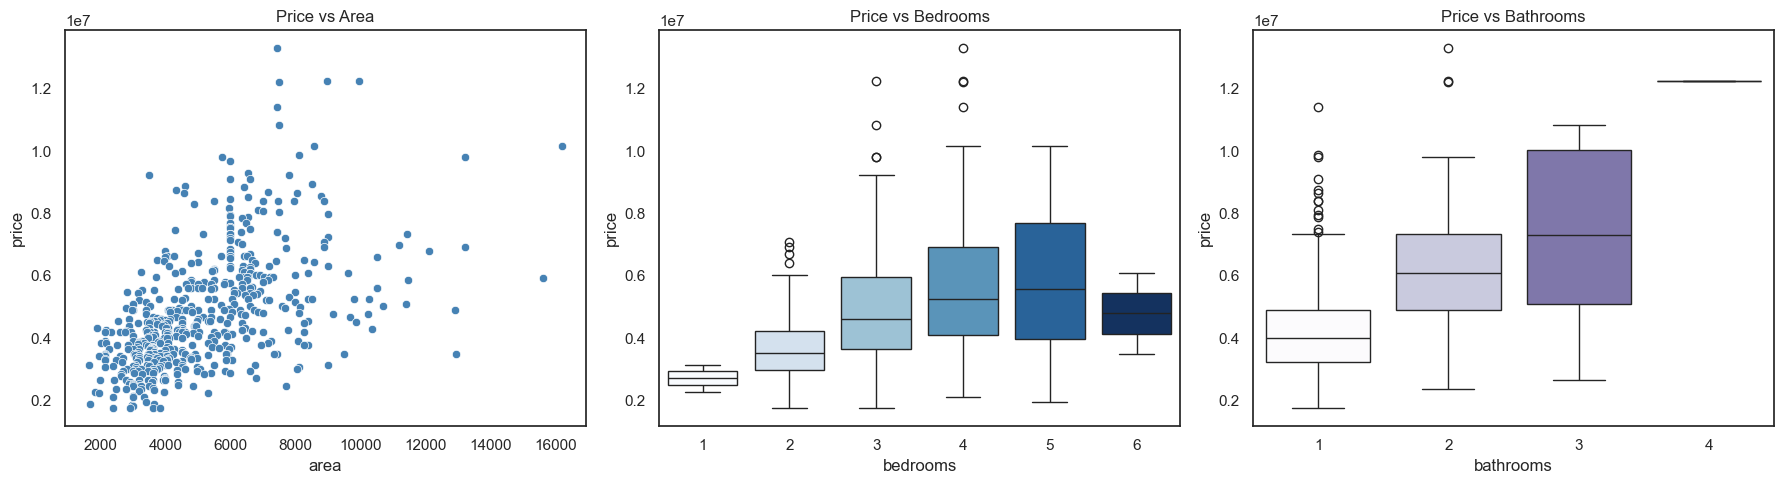

In [331]:
sns.set(style="white")

# Plot: Price vs Area, Bedrooms, Bathrooms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Price vs Area
sns.scatterplot(data=df, x="area", y="price", ax=axes[0], color="steelblue")
axes[0].set_title("Price vs Area")

# Price vs Bedrooms
sns.boxplot(data=df, x="bedrooms", y="price", hue="bedrooms", palette="Blues", ax=axes[1], legend=False)
axes[1].set_title("Price vs Bedrooms")

# Price vs Bathrooms
sns.boxplot(data=df, x="bathrooms", y="price", hue="bathrooms", palette="Purples", ax=axes[2], legend=False)
axes[2].set_title("Price vs Bathrooms")

plt.tight_layout()
plt.show()

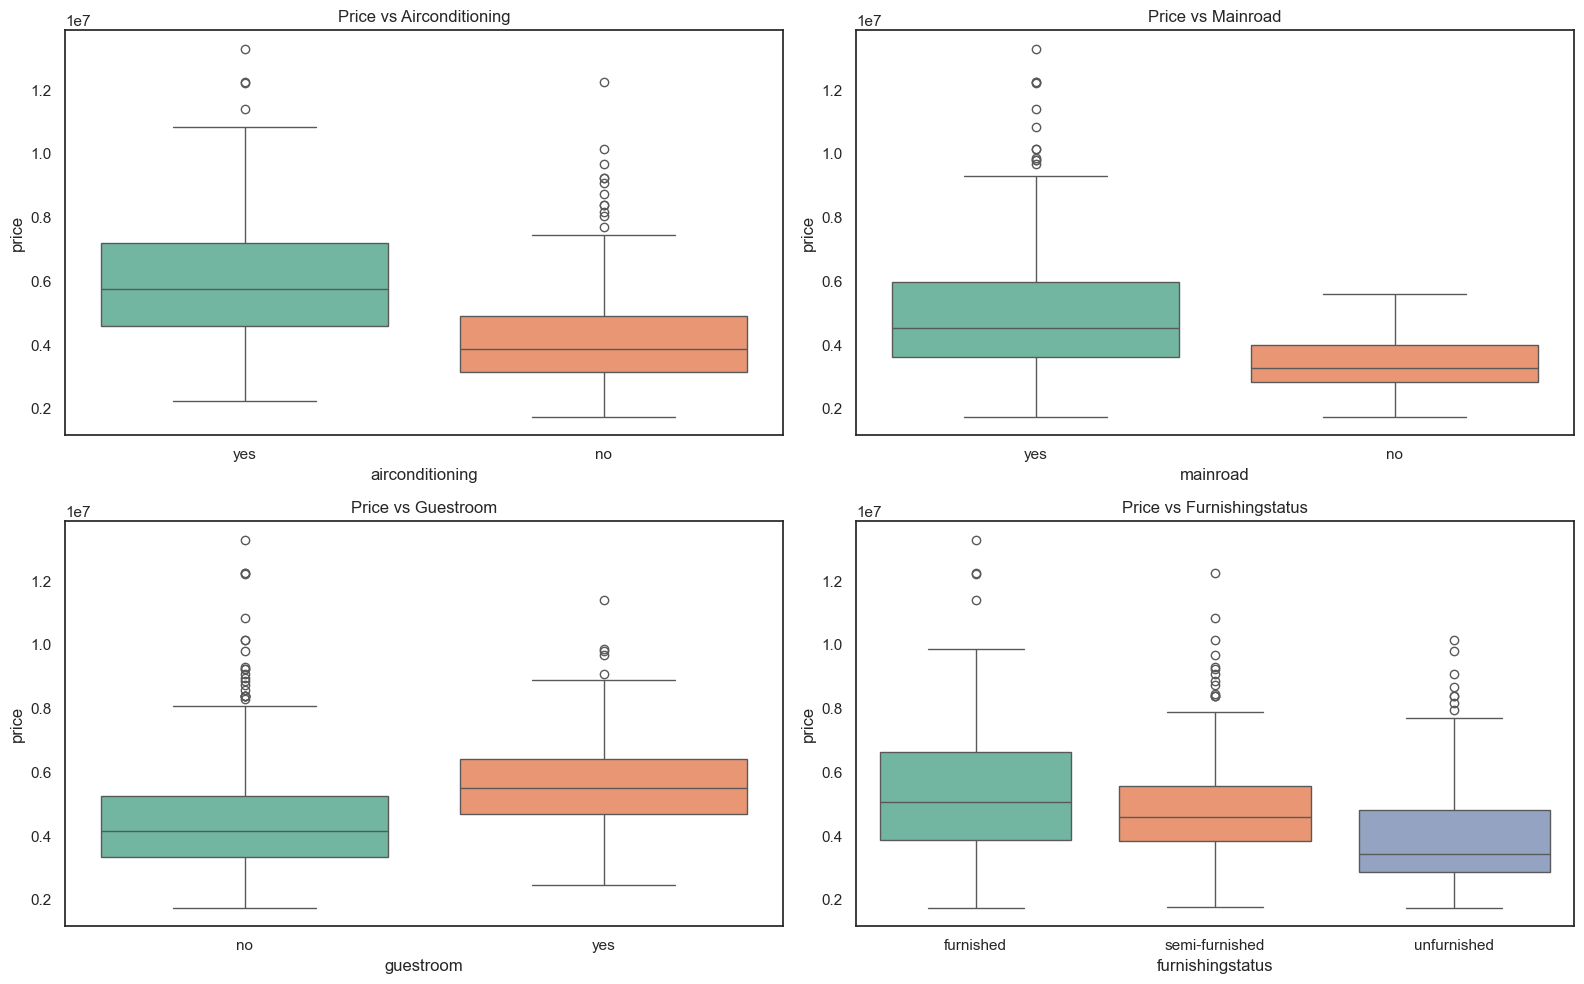

In [ ]:

sns.set(style="white")

cat_features = ["airconditioning", "mainroad", "guestroom", "furnishingstatus"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for ax, feature in zip(axes.flatten(), cat_features):
    sns.boxplot(
        data=df,
        x=feature,
        y="price",
        hue=feature,
        palette="Set2",
        ax=ax,
        legend=False  
    )
    ax.set_title(f"Price vs {feature.capitalize()}")

plt.tight_layout()
plt.show()


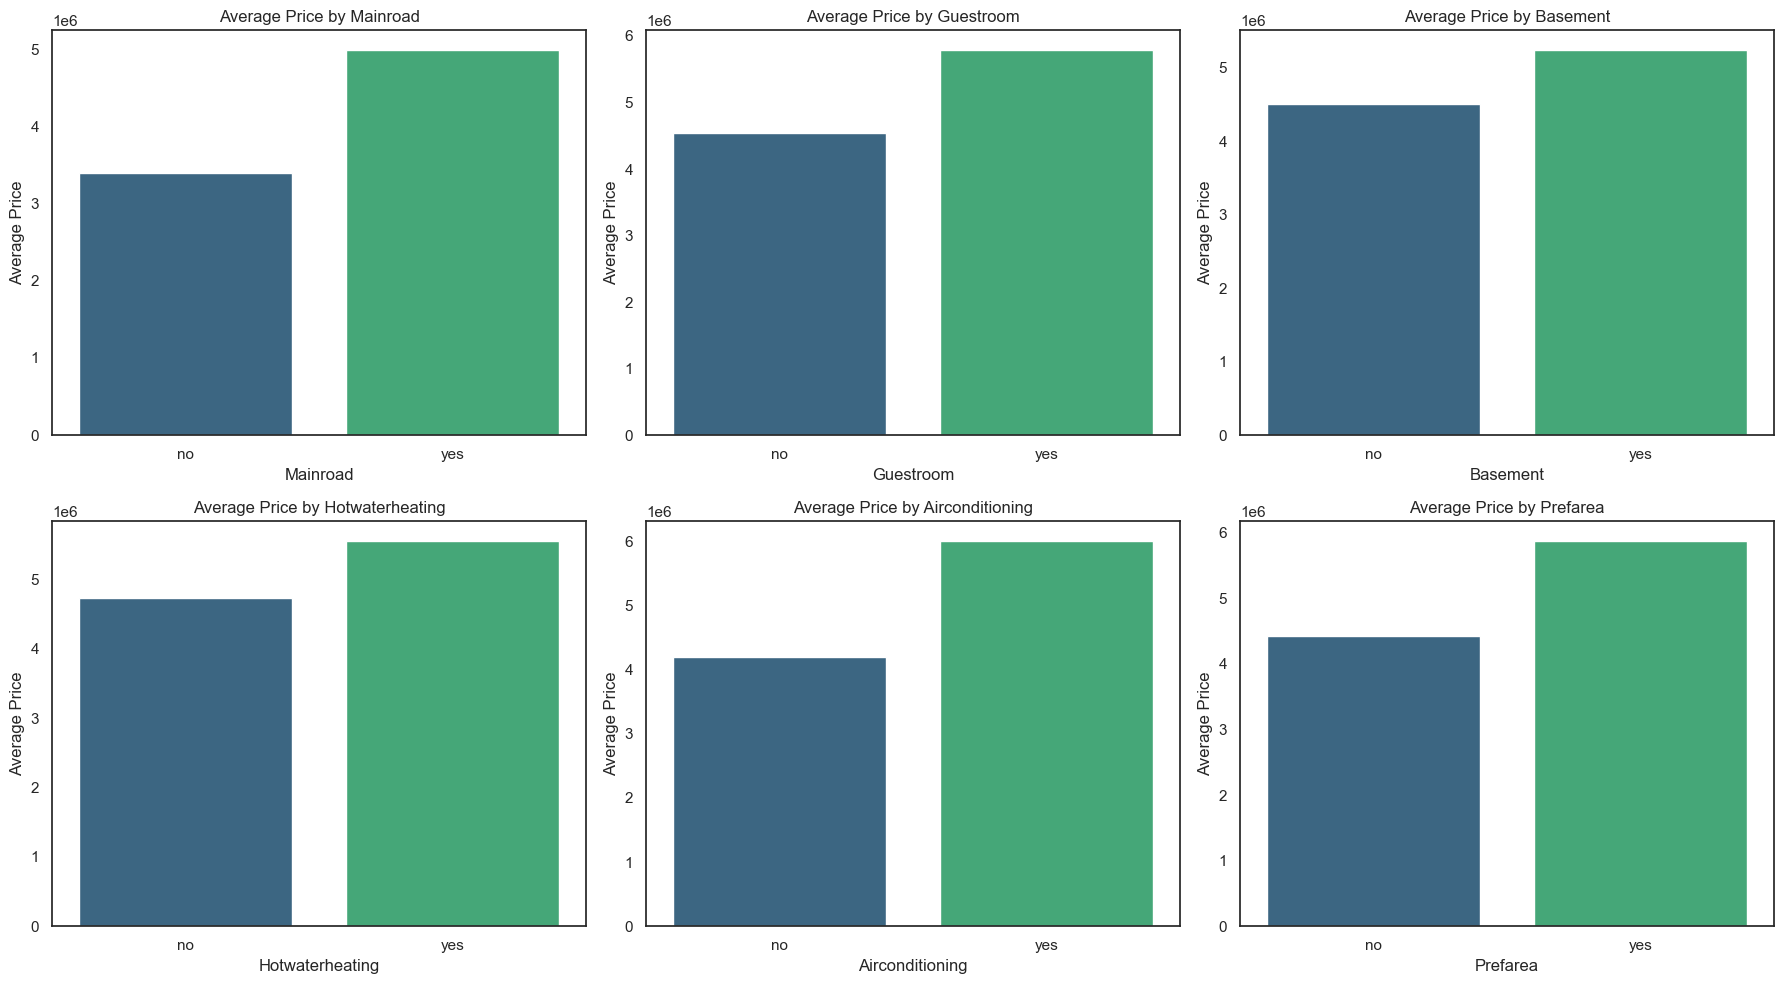

In [ ]:


sns.set(style="white")


yes_no_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, col in zip(axes.flatten(), yes_no_columns):
    avg_prices = df.groupby(col)["price"].mean().reset_index()
    sns.barplot(data=avg_prices, x=col, y="price", hue=col, palette="viridis", ax=ax, legend=False)
    ax.set_title(f"Average Price by {col.capitalize()}")
    ax.set_ylabel("Average Price")
    ax.set_xlabel(col.capitalize())

plt.tight_layout()
plt.show()


### Univariate analysis


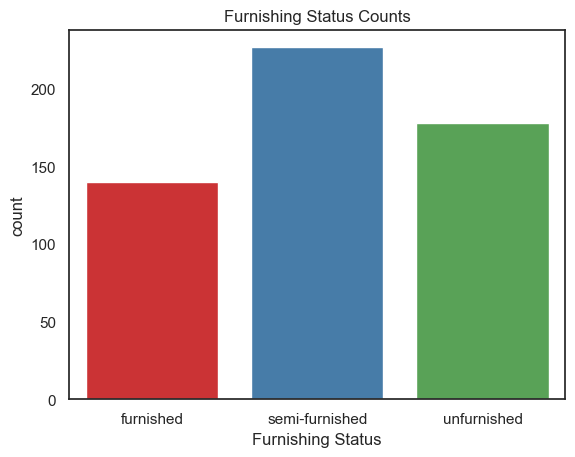

In [334]:
sns.countplot(data=df, x="furnishingstatus", hue="furnishingstatus", palette="Set1", legend=False)
plt.xlabel("Furnishing Status")
plt.title("Furnishing Status Counts")
plt.show()

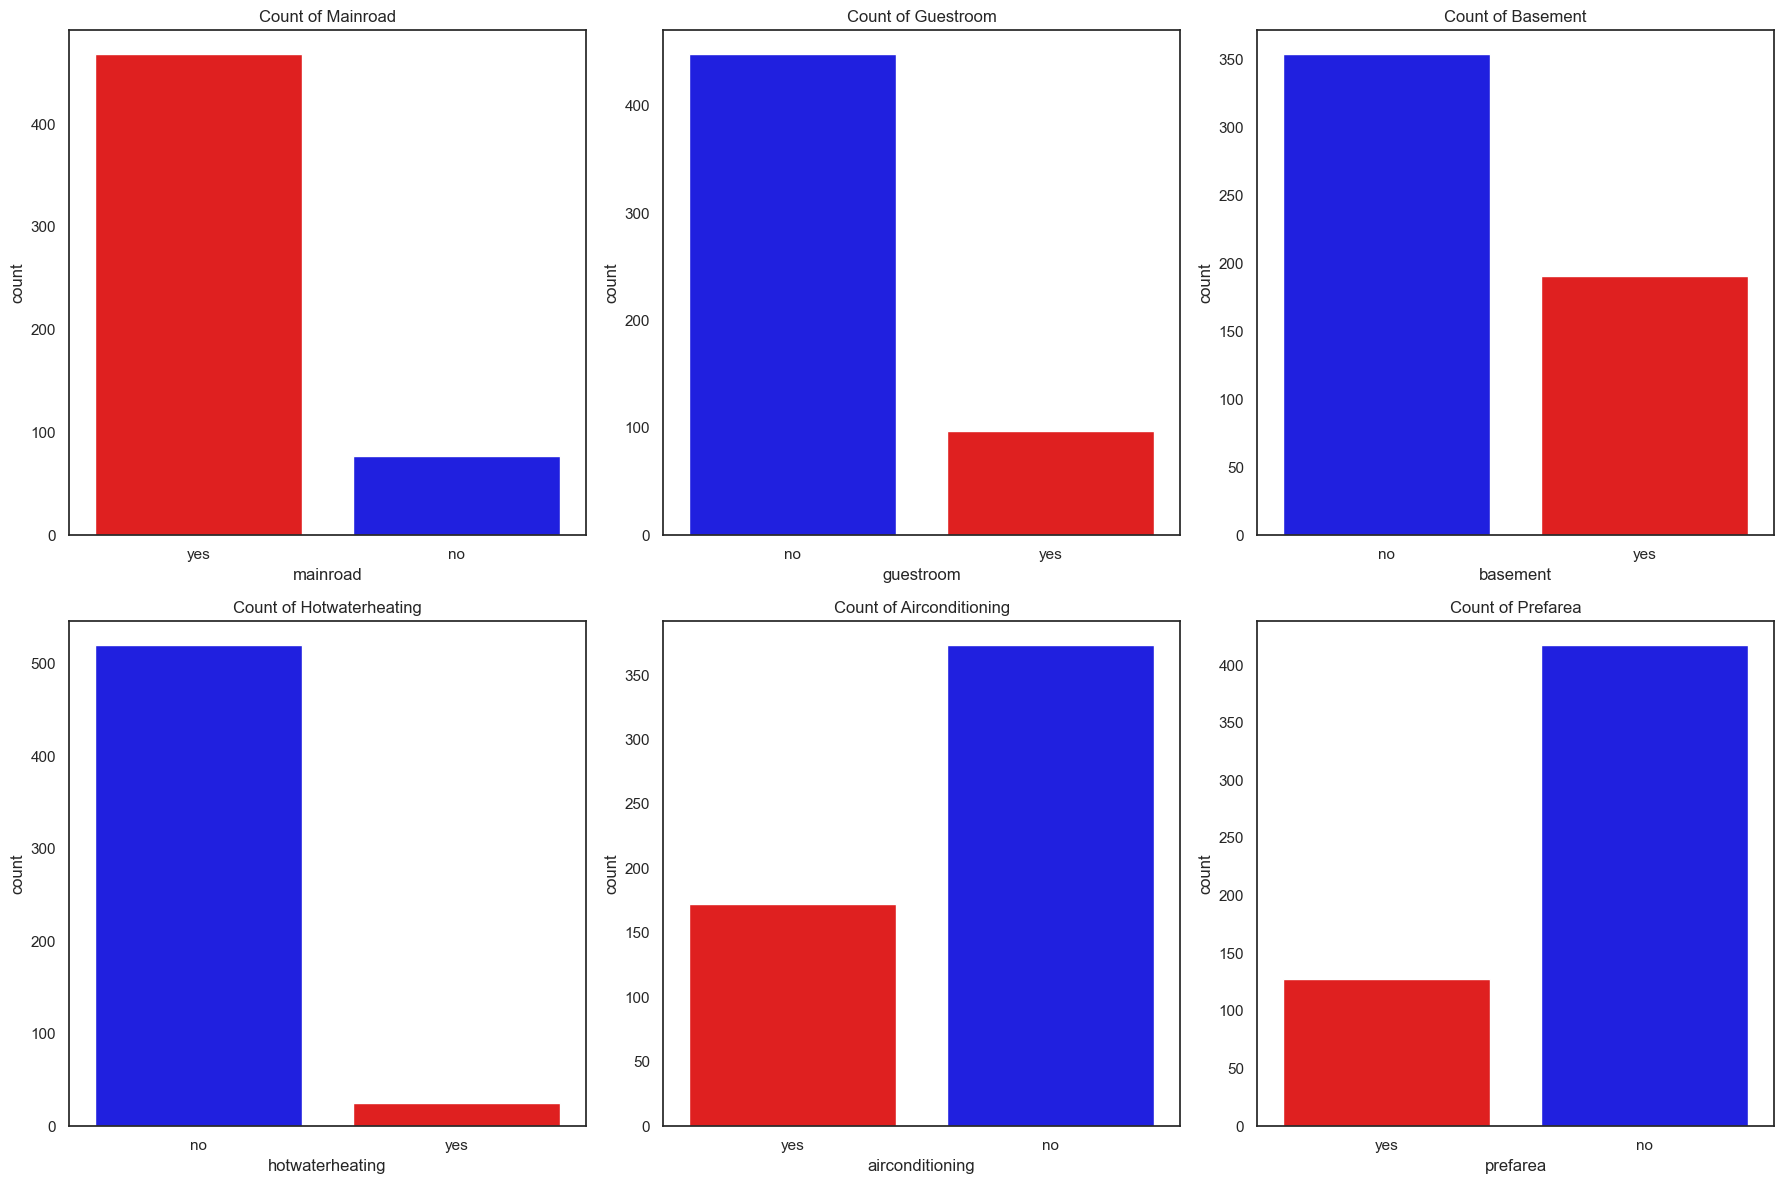

In [ ]:
# Plot counts of categorical columns (univariate)
categorical_cols = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(data=df, x=col, hue=col, ax=ax, palette = {'yes': 'red', 'no': 'blue'})
    ax.set_title(f"Count of {col.capitalize()}")
plt.tight_layout()
plt.show()


### Encoding categoricaal columns

In [336]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])

In [337]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['guestroom'] = le.fit_transform(df['guestroom'])

In [338]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['basement'] = le.fit_transform(df['basement'])

In [339]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])

In [340]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airconditioning'] = le.fit_transform(df['airconditioning'])

In [341]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['prefarea'] = le.fit_transform(df['prefarea'])

In [342]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


### ONE HOT ENCODING on furnishingstatus column

In [343]:
df = pd.get_dummies(df, columns=['furnishingstatus'],dtype=int, drop_first=True)

In [344]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0
